In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error


In [53]:
!pip install pandas_datareader

In [3]:
!pip install requests
!pip install html5lib
!pip install bs4

In [4]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [55]:
!pip install vaderSentiment

In [23]:
#jswsteel mint

import requests
from bs4 import BeautifulSoup
import pandas as pd

def getLiveUpdates():
    headers = {
        "User-Agent":
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36"
    }
    try:
        response = requests.get(
            "https://www.livemint.com/market/live-blog/jsw-steel-share-price-today-latest-live-updates-on-23-may-2024-11716431845439.html", headers=headers
        )
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, "html.parser")

        # Extracting the title of the webpage
        title_elem = soup.find("h2", class_="liveTitle")
        title = title_elem.get_text(strip=True) if title_elem else "No Title Available"
        print("Title:", title)
        print("="*50)

        live_updates = []

        for div in soup.find_all("div", class_="liveSec"):
            timestamp_elem = div.find("span", class_="timeStamp")
            content_elem = div.find("p")

            Date = timestamp_elem.get_text(strip=True) if timestamp_elem else "No Timestamp Available"
            content = content_elem.get_text(strip=True) if content_elem else "No Content Available"

            live_updates.append(
                {
                    "Title": title,
                    "Date": Date,  # Changed "Timestamp" to "Date"
                    "Content": content,
                }
            )

        for update in live_updates:
            print("Title:", update["Title"])
            print("Date:", update["Date"])  # Changed "Timestamp" to "Date"
            print("Content:", update["Content"])
            print("="*50)  # Separating each live update with a line

        # Save data to CSV
        save_to_csv(live_updates, "jswnewssteel.csv")  # Change filename to "jswnewssteel.csv"

    except requests.RequestException as e:
        print("Error fetching data:", e)


def save_to_csv(live_updates, filename):
    """
    Save live updates to CSV file.

    Parameters:
    - live_updates (list of dict): List containing dictionaries with live update data.
    - filename (str): Name of the CSV file to save.
    """
    try:
        # Read the existing CSV file if it exists, otherwise create an empty DataFrame
        try:
            combined_df = pd.read_csv(filename)
        except FileNotFoundError:
            combined_df = pd.DataFrame()

        # Convert the live updates to a DataFrame
        new_df = pd.DataFrame(live_updates)

        # Check if the DataFrame is empty
        if combined_df.empty:
            combined_df = new_df
        else:
            # Check for duplicate entries based on content
            new_content = set(new_df['Content'])
            existing_content = set(combined_df['Content'])
            unique_content = new_content - existing_content

            # Append only new unique entries to the existing DataFrame
            if unique_content:
                new_unique_entries = new_df[new_df['Content'].isin(unique_content)]
                combined_df = pd.concat([combined_df, new_unique_entries], ignore_index=True)
                print("New unique entries added to", filename)
            else:
                print("No new unique entries to add")

        # Save the updated DataFrame to a CSV file
        combined_df.to_csv(filename, index=False)

    except Exception as e:
        print("Error:", e)

# Run the function to scrape live updates and save them to CSV
getLiveUpdates()


Title: Jsw Steel Share Price Live Updates: Shareholding information
Title: Jsw Steel Share Price Live Updates: Shareholding information
Date: 23 May 2024, 08:01:07 PM IST
Content: Jsw Steel Share Price Live Updates: Jsw Steel has a 6.59% MF holding & 11.05% FII holding as per filings in the march quarter.The MF holding has decreased from 6.61% in december to 6.59% in march quarter.The FII holding has decreased from 11.32% in december to 11.05% in march quarter.
Title: Jsw Steel Share Price Live Updates: Shareholding information
Date: 23 May 2024, 07:40:03 PM IST
Content: Jsw Steel Share Price Live Updates: Jsw Steel reported a ROE of 12.29% in the most recent fiscal year. Its return on investment was 5.99% in the last fiscal year. The consensus estimates for ROE in the current and upcoming fiscal year are 14.74% and 17.54% respectively.
Title: Jsw Steel Share Price Live Updates: Shareholding information
Date: 23 May 2024, 07:07:01 PM IST
Content: Jsw Steel Share Price Live Updates: Jsw

In [ ]:
# manually news entries









import pandas as pd

def save_to_csv(live_updates, filename):
    """
    Save live updates to CSV file.

    Parameters:
    - live_updates (list of dict): List containing dictionaries with live update data.
    - filename (str): Name of the CSV file to save.
    """
    try:
        # Read the existing CSV file if it exists, otherwise create an empty DataFrame
        try:
            combined_df = pd.read_csv(filename)
        except FileNotFoundError:
            combined_df = pd.DataFrame()

        # Convert the live updates to a DataFrame
        new_df = pd.DataFrame(live_updates)

        # Check if the DataFrame is empty
        if combined_df.empty:
            combined_df = new_df
        else:
            # Check for duplicate entries based on both content and title
            new_unique_entries = []
            for index, row in new_df.iterrows():
                if (row['Title'] not in combined_df['Title'].values) and (row['Content'] not in combined_df['Content'].values):
                    new_unique_entries.append(row)

            if new_unique_entries:
                combined_df = pd.concat([combined_df, pd.DataFrame(new_unique_entries)], ignore_index=True)
                print("New unique entries added to", filename)
                print("Entry is entered into the dataset.")
            else:
                print("No new unique entries to add")
                print("Entry is not entered into the dataset.")

        # Save the updated DataFrame to a CSV file
        combined_df.to_csv(filename, index=False)

    except Exception as e:
        print("Error:", e)


def manually_set_live_updates():
    """
    Manually set Title, Date, and Content.
    """
    title = '''

    JSW Steel 13 may

    '''
    date = " 13 May 2024, 08:05:58 PM IST "
    content = '''



    '''

    live_updates = [
        {
            "Title": title,
            "Date": date,
            "Content": content
        }
    ]

    # Save data to CSV with the new filename
    save_to_csv(live_updates, 'jswnewssteel.csv')

# Run the function to manually set live updates and save them to CSV
manually_set_live_updates()


New unique entries added to jswnewssteel.csv
Entry is entered into the dataset.


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load news data
news_df = pd.read_csv('jswnewssteel.csv')
print("News data loaded successfully")
print(news_df.head())


News data loaded successfully
                                               Title  \
0  Jsw Steel share price Live :Jsw Steel closed t...   
1  Jsw Steel share price Live :Jsw Steel closed t...   
2  Jsw Steel share price Live :Jsw Steel closed t...   
3  Jsw Steel share price Live :Jsw Steel closed t...   
4  Jsw Steel share price Live :Jsw Steel closed t...   

                           Date  \
0  23 Aug 2023, 06:31:02 PM IST   
1  23 Aug 2023, 06:18:39 PM IST   
2  23 Aug 2023, 05:07:24 PM IST   
3  23 Aug 2023, 03:28:12 PM IST   
4  23 Aug 2023, 03:20:34 PM IST   

                                             Content  
0  Today, the closing price of JSW Steel stock wa...  
1                               No Content Available  
2  JSW Steel stock reached a low of₹793.25 and a ...  
3  JSW Steel is currently trading at a spot price...  
4  JSW Steel Limited stock's 52 week low price wa...  


In [76]:
# Function to parse date and handle timezone warnings
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, errors='coerce')
    except Exception as e:
        print(f"Error parsing date: {e}")
        return pd.NaT

# Apply the date parsing function
news_df['Date'] = news_df['Date'].apply(parse_date)

# Drop rows with invalid dates
news_df = news_df.dropna(subset=['Date'])

print("Date parsing and cleaning done")
print(news_df.head())


C:\Users\raghw\AppData\Local\Temp\ipykernel_31724\4166782687.py:4: FutureWarning: Parsed string "23 Aug 2023, 06:31:02 PM IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  return pd.to_datetime(date_str, errors='coerce')
C:\Users\raghw\AppData\Local\Temp\ipykernel_31724\4166782687.py:4: FutureWarning: Parsed string "23 Aug 2023, 06:18:39 PM IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  return pd.to_datetime(date_str, errors='coerce')
C:\Users\raghw\AppData\Local\Temp\ipykernel_31724\4166782687.py:4: FutureWarning: Parsed string "23 Aug 2023, 05:07:24 PM IST" included an un-recognized timezone "IST". Dropping unre

Date parsing and cleaning done
                                               Title                Date  \
0  Jsw Steel share price Live :Jsw Steel closed t... 2023-08-23 18:31:02   
1  Jsw Steel share price Live :Jsw Steel closed t... 2023-08-23 18:18:39   
2  Jsw Steel share price Live :Jsw Steel closed t... 2023-08-23 17:07:24   
3  Jsw Steel share price Live :Jsw Steel closed t... 2023-08-23 15:28:12   
4  Jsw Steel share price Live :Jsw Steel closed t... 2023-08-23 15:20:34   

                                             Content  
0  Today, the closing price of JSW Steel stock wa...  
1                               No Content Available  
2  JSW Steel stock reached a low of₹793.25 and a ...  
3  JSW Steel is currently trading at a spot price...  
4  JSW Steel Limited stock's 52 week low price wa...  


C:\Users\raghw\AppData\Local\Temp\ipykernel_31724\4166782687.py:4: FutureWarning: Parsed string "22 May 2024, 09:56:29 AM IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  return pd.to_datetime(date_str, errors='coerce')
C:\Users\raghw\AppData\Local\Temp\ipykernel_31724\4166782687.py:4: FutureWarning: Parsed string "22 May 2024, 09:47:47 AM IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  return pd.to_datetime(date_str, errors='coerce')
C:\Users\raghw\AppData\Local\Temp\ipykernel_31724\4166782687.py:4: FutureWarning: Parsed string "22 May 2024, 09:30:59 AM IST" included an un-recognized timezone "IST". Dropping unre

In [78]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    try:
        sentiment = analyzer.polarity_scores(text)
        return sentiment['compound']
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return 0

# Apply sentiment analysis to the Content column
news_df['Sentiment'] = news_df['Content'].apply(get_sentiment)

print("Sentiment analysis done")
print(news_df.head())

# Aggregate sentiment scores over 7-day windows
news_df.set_index('Date', inplace=True)
news_df = news_df.resample('7D').mean(numeric_only=True).reset_index()

print("Sentiment aggregation done")
print(news_df.head())


KeyError: 'Content'

In [79]:
# Fetch stock data
current_date = datetime.today().strftime('%Y-%m-%d')
stock_df = yf.download('JSWSTEEL.NS', start='2023-08-29', end=current_date, progress=False)
stock_df.reset_index(inplace=True)

print("Stock data fetched successfully")
print(stock_df.head())

columns_to_drop = ['Adj Close', 'Volume']
stock_df.drop(columns=columns_to_drop, inplace=True)

print("Columns dropped successfully")
print(stock_df.head())

# Calculate support and resistance
def calculate_support_resistance(data, window=20):
    data['Support'] = data['Low'].rolling(window=window).min()
    data['Resistance'] = data['High'].rolling(window=window).max()
    return data

stock_df = calculate_support_resistance(stock_df)
print("Support and resistance calculated")
print(stock_df.head())


Stock data fetched successfully
        Date        Open        High         Low       Close   Adj Close  \
0 2023-08-29  778.900024  785.900024  775.549988  782.650024  782.650024   
1 2023-08-30  784.700012  791.950012  784.099976  787.150024  787.150024   
2 2023-08-31  787.150024  791.799988  777.000000  779.650024  779.650024   
3 2023-09-01  779.000000  807.700012  778.000000  806.400024  806.400024   
4 2023-09-04  811.950012  826.599976  808.500000  809.799988  809.799988   

    Volume  
0  1807893  
1  1978468  
2  3999415  
3  3513798  
4  3571051  
Columns dropped successfully
        Date        Open        High         Low       Close
0 2023-08-29  778.900024  785.900024  775.549988  782.650024
1 2023-08-30  784.700012  791.950012  784.099976  787.150024
2 2023-08-31  787.150024  791.799988  777.000000  779.650024
3 2023-09-01  779.000000  807.700012  778.000000  806.400024
4 2023-09-04  811.950012  826.599976  808.500000  809.799988
Support and resistance calculated
    

In [80]:
# Merge stock data with sentiment data
merged_df = pd.merge(stock_df, news_df[['Date', 'Sentiment']], on='Date', how='left')
merged_df['Sentiment'].fillna(method='ffill', inplace=True)

print("Merged dataframe created")
print(merged_df.head())


Merged dataframe created
        Date        Open        High         Low       Close  Support  \
0 2023-08-29  778.900024  785.900024  775.549988  782.650024      NaN   
1 2023-08-30  784.700012  791.950012  784.099976  787.150024      NaN   
2 2023-08-31  787.150024  791.799988  777.000000  779.650024      NaN   
3 2023-09-01  779.000000  807.700012  778.000000  806.400024      NaN   
4 2023-09-04  811.950012  826.599976  808.500000  809.799988      NaN   

   Resistance  Sentiment  
0         NaN   0.285951  
1         NaN   0.285951  
2         NaN   0.285951  
3         NaN   0.285951  
4         NaN   0.285951  


C:\Users\raghw\AppData\Local\Temp\ipykernel_31724\2024439164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Sentiment'].fillna(method='ffill', inplace=True)
C:\Users\raghw\AppData\Local\Temp\ipykernel_31724\2024439164.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Sentiment'].fillna(method='ffill', inplace=True)


In [81]:
# Feature engineering
merged_df['Previous_Close'] = merged_df['Close'].shift(1)
merged_df['Price_Change'] = merged_df['Close'] - merged_df['Previous_Close']
merged_df.dropna(inplace=True)

features = merged_df[['Previous_Close', 'Sentiment', 'Support', 'Resistance']]
target = merged_df['Close']

print("Features and target defined")
print(features.head())
print(target.head())

# Save features and target to CSV
features.to_csv('features.csv', index=False)
target.to_csv('target.csv', index=False)


Features and target defined
    Previous_Close  Sentiment     Support  Resistance
19      779.900024     0.9299  772.700012       840.0
20      779.650024     0.9299  772.700012       840.0
21      779.599976     0.9299  764.349976       840.0
22      768.099976     0.9299  764.349976       840.0
23      779.599976     0.9299  764.349976       840.0
19    779.650024
20    779.599976
21    768.099976
22    779.599976
23    770.250000
Name: Close, dtype: float64


In [83]:
# Model training and evaluation
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
print("Model training complete")

# Save the model
joblib.dump(mlp_model, 'mlp_modelJSWSTELL.pkl')

# Load the model
loaded_model = joblib.load('mlp_modelJSWSTELL.pkl')

# Predictions and evaluation
predictions = loaded_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Model training complete
Mean Squared Error (MSE): 1459.584471912456
Mean Absolute Error (MAE): 34.466773154798474
R-squared (R²): 0.2793867143498606


In [84]:
# Future predictions
today = datetime.today().date()
next_seven_days_dates = [today + timedelta(days=i) for i in range(7)]

# Use the last 7 days of data as the starting point for predictions
last_7_days = merged_df.iloc[-7:][['Previous_Close', 'Sentiment', 'Support', 'Resistance']].values

predicted_close_prices = []
predicted_price_changes = []

for i in range(7):
    X_next_day = pd.DataFrame(last_7_days, columns=['Previous_Close', 'Sentiment', 'Support', 'Resistance'])
    next_day_close = mlp_model.predict(X_next_day.iloc[[-1]])[0]
    
    predicted_close_prices.append(next_day_close)
    
    price_change = next_day_close - last_7_days[-1][0]
    predicted_price_changes.append(price_change)

    last_7_days = np.append(last_7_days[1:], [[next_day_close, last_7_days[-1][1], last_7_days[-1][2], last_7_days[-1][3]]], axis=0)

predicted_df = pd.DataFrame({
    'Date': next_seven_days_dates,
    'Predicted_Close': predicted_close_prices,
    'Predicted_Price_Change': predicted_price_changes
})

predicted_df.to_csv('predicted_prices.csv', index=False)
print("Predicted prices saved to predicted_prices.csv")


Predicted prices saved to predicted_prices.csv


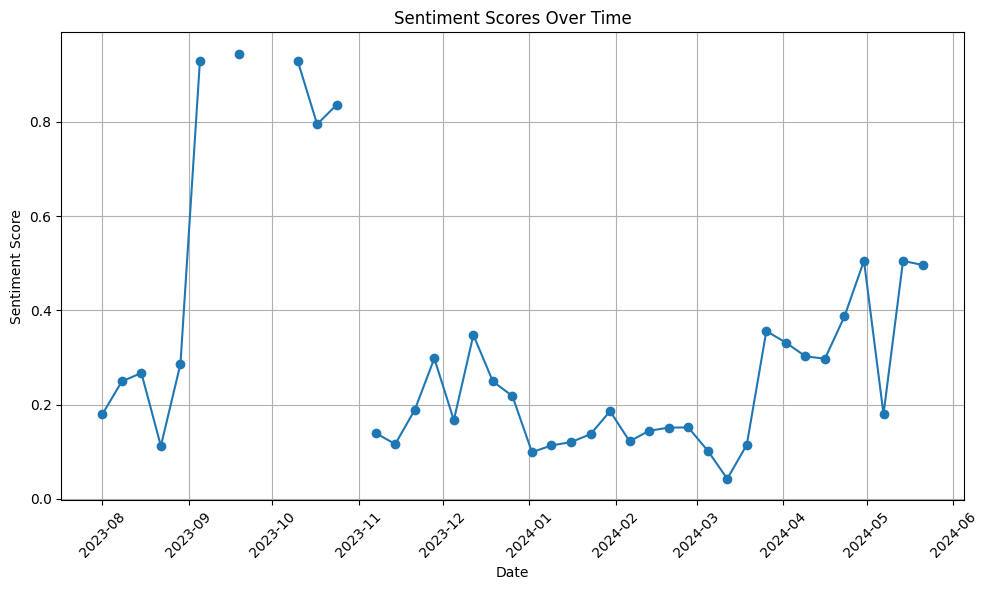

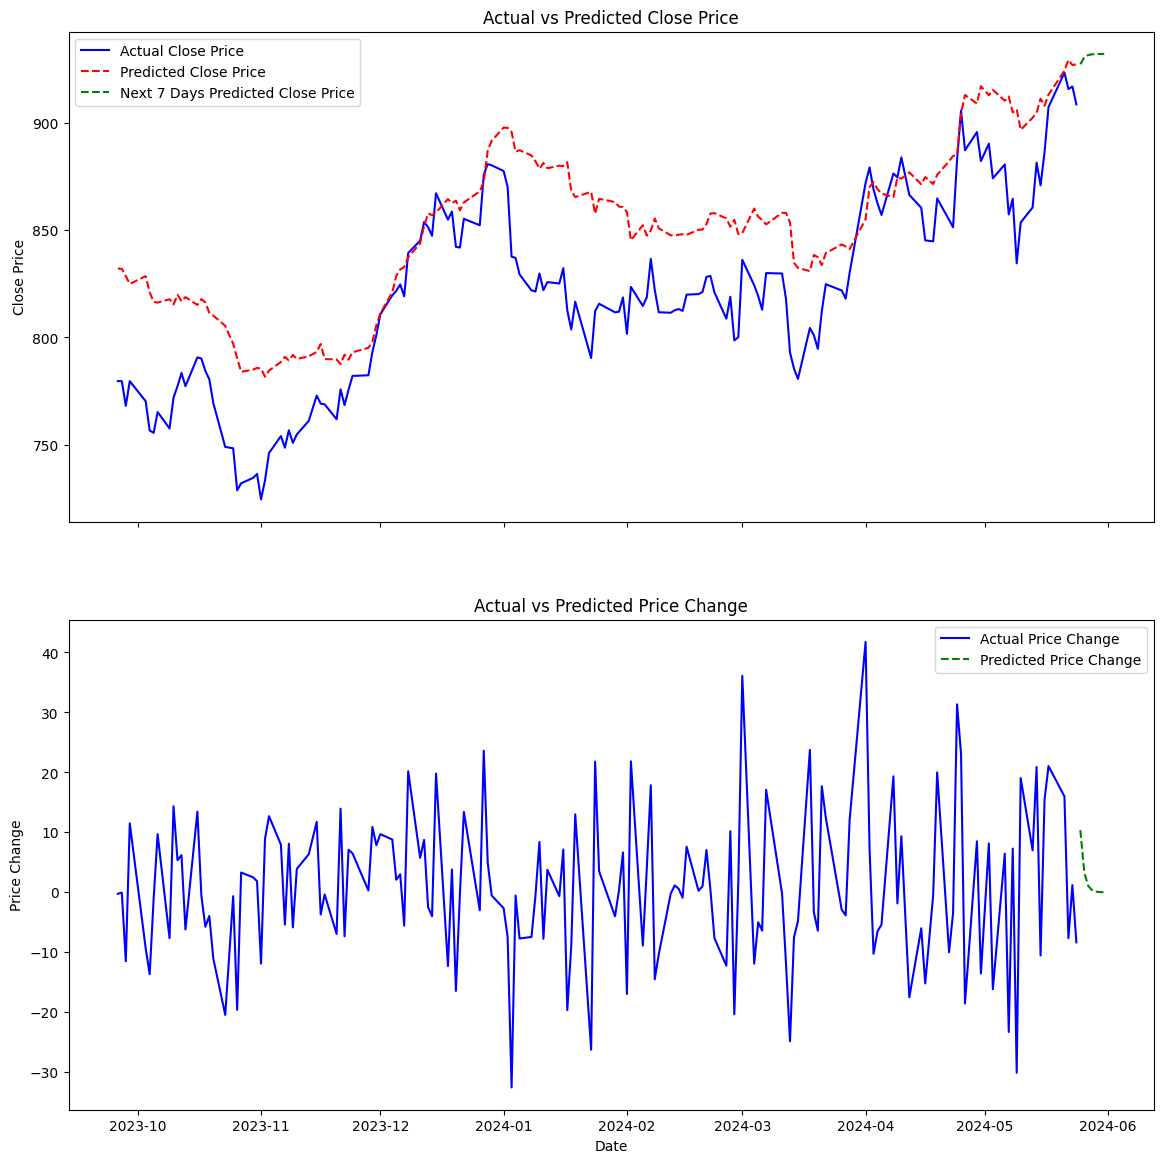

Results saved to newsexperiment_try.csv


In [85]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(news_df['Date'], news_df['Sentiment'], marker='o', linestyle='-')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df['Actual_Price_Change'] = merged_df['Close'] - merged_df['Previous_Close']
predicted_close_df = merged_df[['Date', 'Close']].copy()
predicted_close_df['Predicted_Close'] = mlp_model.predict(merged_df[['Previous_Close', 'Sentiment', 'Support', 'Resistance']])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14), sharex=True)

ax1.plot(merged_df['Date'], merged_df['Close'], label='Actual Close Price', color='blue')
ax1.plot(predicted_close_df['Date'], predicted_close_df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--')
ax1.plot(predicted_df['Date'], predicted_df['Predicted_Close'], label='Next 7 Days Predicted Close Price', color='green', linestyle='--')
ax1.set_ylabel('Close Price')
ax1.set_title('Actual vs Predicted Close Price')
ax1.legend()

ax2.plot(merged_df['Date'], merged_df['Actual_Price_Change'], label='Actual Price Change', color='blue')
ax2.plot(predicted_df['Date'], predicted_df['Predicted_Price_Change'], label='Predicted Price Change', color='green', linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price Change')
ax2.set_title('Actual vs Predicted Price Change')
ax2.legend()

plt.show()

# Save results
merged_df.to_csv('newsexperiment_try.csv', index=False)
print("Results saved to newsexperiment_try.csv")
